In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from google.colab import drive
drive.mount('/content/drive')
#df=pd.read_csv('brfss2020.csv')
df = pd.read_csv("/content/drive/MyDrive/DSS_Pipeline/brfss2020.csv")

import os
from google.colab import files

In [ ]:
state = {
    1: 'Alabama',
    2: 'Alaska',
    4: 'Arizona',
    5: 'Arkansas',
    6: 'California',
    8: 'Colorado',
    9: 'Connecticut',
    10: 'Delaware',
    11: ' District of Columbia',
    12: 'Florida',
    13: 'Georgia',
    15: 'Hawaii',
    16: 'Idaho',
    17: 'Illinois',
    18: 'Indiana',
    19: 'Iowa',
    20: 'Kansas',
    21: 'Kentucky',
    22: 'Louisiana',
    23: 'Maine',
    24: 'Maryland',
    25: 'Massachusetts',
    26: 'Michigan',
    27: 'Minnesota',
    28: 'Mississippi',
    29: 'Missouri',
    30: 'Montana',
    31: 'Nebraska',
    32: 'Nevada',
    33: 'New Hampshire',
    34: 'New Jersey',
    35: 'New Mexico',
    36: 'New York',
    37: 'North Carolina',
    38: 'North Dakota',
    39: 'Ohio',
    40: 'Oklahoma',
    41: 'Oregon',
    42: 'Pennsylvania',
    44: 'Rhode Island',
    45: 'South Carolina',
    46: 'South Dakota',
    47: 'Tennessee',
    48: 'Texas',
    49: 'Utah',
    50: 'Vermont',
    51: 'Virginia',
    53: 'Washington',
    54: 'West Virginia',
    55: 'Wisconsin',
    56: 'Wyoming',
    66: 'Guam',
    72: 'Puerto Rico'
}

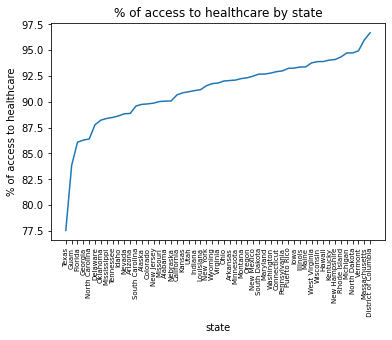

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

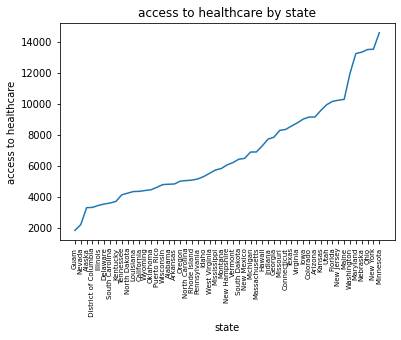

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
#state-wise health care access

data1 = df[df['HLTHPLN1']==1].groupby(['_STATE'])['HLTHPLN1'].size().reset_index()
data2 = df[df['HLTHPLN1']!=1].groupby(['_STATE'])['HLTHPLN1'].count().reset_index()
data1['HLTHPLN1_percentage'] = 100*data1['HLTHPLN1']/(data1['HLTHPLN1']+data2['HLTHPLN1'])

sorted_data1 = data1.sort_values(['HLTHPLN1_percentage', '_STATE'])

plt.plot([state[i] for i in sorted_data1['_STATE'].tolist()], sorted_data1['HLTHPLN1_percentage'])
plt.xlabel('state')
plt.ylabel('% of access to healthcare')
plt.title('% of access to healthcare by state')
plt.xticks(fontsize=7, rotation=90)
plt.show()
plt.savefig("per-hlthcare.png")
files.download("per-hlthcare.png") 

sorted_data1 = data1.sort_values(['HLTHPLN1', '_STATE'])

plt.plot([state[i] for i in sorted_data1['_STATE'].tolist()], sorted_data1['HLTHPLN1'])
plt.xlabel('state')
plt.ylabel('access to healthcare')
plt.title('access to healthcare by state')
plt.xticks(fontsize=7, rotation=90)
plt.show()
plt.savefig("cnt_hlthcare.png")
files.download("cnt_hlthcare.png")

In [ ]:
import numpy as np
missing_values = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in missing_values:
  print(f"{feature} {np.round(df[feature].isnull().mean(), 2)}% missing values")

CTELENM1 0.6896% missing values
PVTRESD1 0.6896% missing values
COLGHOUS 0.9999% missing values
STATERE1 0.6896% missing values
CELPHONE 0.6896% missing values
LADULT1 0.6896% missing values
COLGSEX 0.9999% missing values
NUMADULT 0.6897% missing values
LANDSEX 0.872% missing values
NUMMEN 0.7253% missing values
NUMWOMEN 0.7253% missing values
RESPSLCT 0.882% missing values
SAFETIME 0.3104% missing values
CTELNUM1 0.3104% missing values
CELLFON5 0.3104% missing values
CADULT1 0.3104% missing values
CELLSEX 0.3104% missing values
PVTRESD3 0.3104% missing values
CCLGHOUS 0.9976% missing values
CSTATE1 0.3104% missing values
LANDLINE 0.3104% missing values
HHADULT 0.3104% missing values
GENHLTH 0.0% missing values
PHYSHLTH 0.0% missing values
MENTHLTH 0.0% missing values
POORHLTH 0.4984% missing values
HLTHPLN1 0.0% missing values
PERSDOC2 0.0% missing values
MEDCOST 0.0% missing values
CHECKUP1 0.0% missing values
EXERANY2 0.0% missing values
SLEPTIM1 0.0% missing values
CVDINFR4 0.0% mi

In [ ]:
df.loc[df["CHCSCNCR"] == "1", "CHCSCNCR"] = 'Yes'    # col 120 - skin cancer
df.loc[df["CHCSCNCR"] == "2", "CHCSCNCR"] = 'No'
df.loc[df["CHCSCNCR"] == "7", "CHCSCNCR"] = 'Dont know'
df.loc[df["CHCSCNCR"] == "9", "CHCSCNCR"] = 'Refused'

In [ ]:
#Adding the corresponding states to their respective state id as per the document
df.loc[df["_STATE"] == "1", "_STATE"] = 'Alabama'
df.loc[df["_STATE"] == "2", "_STATE"] = 'Alaska'
df.loc[df["_STATE"] == "4", "_STATE"] = 'Arizona'
df.loc[df["_STATE"] == "5", "_STATE"] = 'Arkankas'

In [ ]:
#Adding codes for gender
df.loc[df["SEXVAR"] == "1", "SEXVAR"] = 'Male'
df.loc[df["SEXVAR"] == "2", "SEXVAR"] = 'Female'

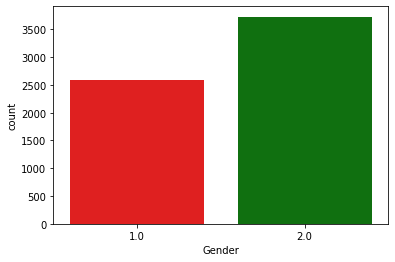

In [ ]:
#Count of MAle and female subjects in the dataset
df_selected = df

df_selected['SEXVAR'].value_counts()
df_selected = df_selected.rename(columns={"SEXVAR":"Gender"})
sns.countplot(x='Gender', data=df_selected, palette=['r', 'g'])

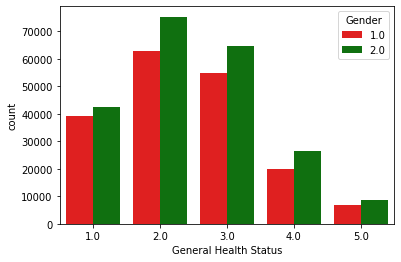

In [ ]:
#General health for male/female in Alabama, Alaska, Arizona and Arkankaz

df_selected['GENHLTH'].value_counts()
df_selected = df_selected[(df_selected['GENHLTH'] != 7) & (df_selected['GENHLTH'] != 9)]
df_selected = df_selected.rename(columns={"GENHLTH":"General Health Status"})
sns.countplot(x='General Health Status', hue='Gender', data=df_selected, palette=['r', 'g'])

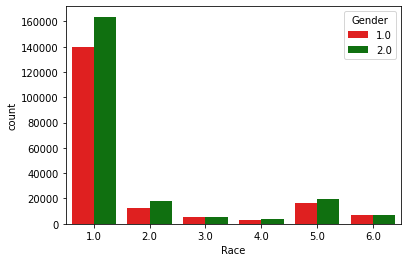

In [ ]:
# race wise male/female count in the dataset
df_selected['_IMPRACE'].value_counts()
df_selected = df_selected.rename(columns={"_IMPRACE":"Race"})
sns.countplot(x='Race', hue='Gender', data=df_selected, palette=['r', 'g'])

In [ ]:
#Add codings for the different marital status
df_selected.loc[df_selected["MARITAL"] == 1, "MARITAL"] = 'Married'    # col 167 - marital status
df_selected.loc[df_selected["MARITAL"] == 2, "MARITAL"] = 'Divorced'
df_selected.loc[df_selected["MARITAL"] == 3, "MARITAL"] = 'Widowed'
df_selected.loc[df_selected["MARITAL"] == 4, "MARITAL"] = 'Seperated'
df_selected.loc[df_selected["MARITAL"] == 5, "MARITAL"] = 'Never married'
df_selected.loc[df_selected["MARITAL"] == 6, "MARITAL"] = 'Member of unmarried couple'
df_selected.loc[df_selected["MARITAL"] == 9, "MARITAL"] = 'Refused'

In [ ]:
#Add coding for health coverage question
df_selected.loc[df_selected["HLTHPLN1"] == 1, "HLTHPLN1"] = 'Yes'    # col 108 - Do u have health coverage
df_selected.loc[df_selected["HLTHPLN1"] == 2, "HLTHPLN1"] = 'No'
df_selected.loc[df_selected["HLTHPLN1"] == 7, "HLTHPLN1"] = 'Dont know'
df_selected.loc[df_selected["HLTHPLN1"] == 9, "HLTHPLN1"] = 'Refused'



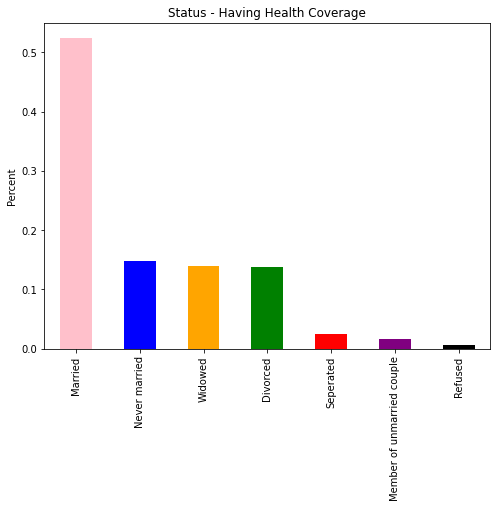

In [ ]:
#Plotting the  people based on marital status, having health coverage

brfss_df_yes = df_selected.loc[df["HLTHPLN1"] == 'Yes']
brfss_df_no = df_selected.loc[df["HLTHPLN1"] == 'No']

a = brfss_df_yes['MARITAL'].value_counts(normalize=True)
c = ['pink', 'blue', 'orange', 'green', 'red', 'purple', 'black']
b = a.plot(kind='bar', color = c, figsize=(8,6))
b.set_ylabel("Percent")
b.set_title("Status - Having Health Coverage")
colors = {'Married':'pink', 'Never Married':'blue', 'Divorced':'orange','Widowed':'green','Unmarried couple':'red', 'Seperated':'purple','Refused to answer':'black'}         
labels = list(colors.keys())

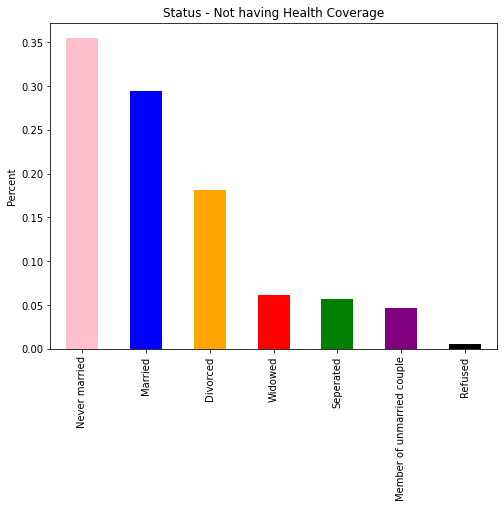

In [ ]:
#Plotting the  people based on marital status, not having health coverage

a = brfss_df_no['MARITAL'].value_counts(normalize=True)
c = ['pink', 'blue', 'orange', 'red', 'green', 'purple', 'black']
b = a.plot(kind='bar', color = c, figsize=(8,6))
#ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
b.set_ylabel("Percent")
b.set_title("Status - Not having Health Coverage")
colors = {'Married':'pink', 'Never Married':'blue', 'Divorced':'orange','Widowed':'green','Unmarried couple':'red', 'Seperated':'purple','Refused to answer':'black'}         
labels = list(colors.keys())
#handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#plt.legend(handles, labels)

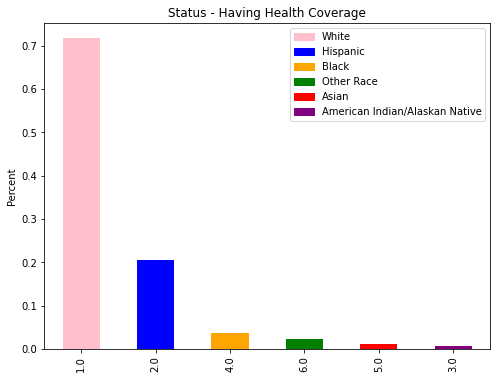

In [ ]:
#Plotting the  people based on race, having health coverage

a = brfss_df_yes['_IMPRACE'].value_counts(normalize=True)
c = ['pink', 'blue', 'orange', 'green', 'red', 'purple', 'black']
b = a.plot(kind='bar', color = c, figsize=(8,6))
b.set_ylabel("Percent")
b.set_title("Status - Having Health Coverage")
colors = {'White':'pink', 'Hispanic':'blue', 'Black':'orange','Other Race':'green','Asian':'red', 'American Indian/Alaskan Native':'purple'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

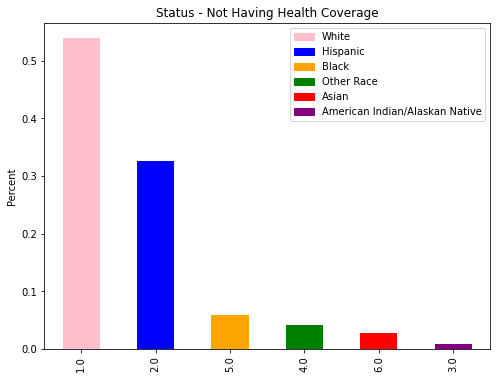

In [ ]:
#Plotting the  people based on race, not having health coverage

a = brfss_df_no['_IMPRACE'].value_counts(normalize=True)
c = ['pink', 'blue', 'orange', 'green', 'red', 'purple', 'black']
b = a.plot(kind='bar', color = c, figsize=(8,6))
b.set_ylabel("Percent")
b.set_title("Status - Not Having Health Coverage")
colors = {'White':'pink', 'Hispanic':'blue', 'Black':'orange','Other Race':'green','Asian':'red', 'American Indian/Alaskan Native':'purple'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)